In [1]:
from __future__ import annotations

%load_ext jupyter_black

In [2]:
import os

import mesoscaler as ms

# Mesoscale

In meteorology mesoscale is a scale of atmospheric motion smaller than synoptic scale but larger than microscale and is
considered to be between 2 and 200 kilometers and includes phenomena such as sea breezes and lake-effect snowstorms.
Specifically this application targets mesoscale-beta which is 20-200 km.


> Meso-beta 20–200 km scale of phenomena like sea breezes, lake effect snow storms

The resampling methods target a `~200km` surface extent at a `2.5km` resolution, this results in an image size of `80x80` pixels.

In [3]:
urma_grid_resolution = 2.5  # km
dx, dy = 200, 175  # km
width, height = dx // urma_grid_resolution, dy // urma_grid_resolution  # (80, 70) px
print(f"{dx=} {dy=} {width=} {height=}")

dx=200 dy=175 width=80.0 height=70.0


Mesoscale(size=8):
-       scale: [ 1.00  2.87  4.74  6.62  8.13  9.35 10.19 10.53]
- levels[hPa]: [1013.25 1000.00  950.00  850.00  700.00  500.00  300.00  200.00]
-  extent[km]: 
[[ -200.00  -175.00   200.00   175.00]
 [ -574.47  -502.66   574.47   502.66]
 [ -948.93  -830.32   948.93   830.32]
 [-1323.40 -1157.98  1323.40  1157.98]
 [-1625.73 -1422.51  1625.73  1422.51]
 [-1869.91 -1636.17  1869.91  1636.17]
 [-2037.47 -1782.79  2037.47  1782.79]
 [-2105.09 -1841.95  2105.09  1841.95]]


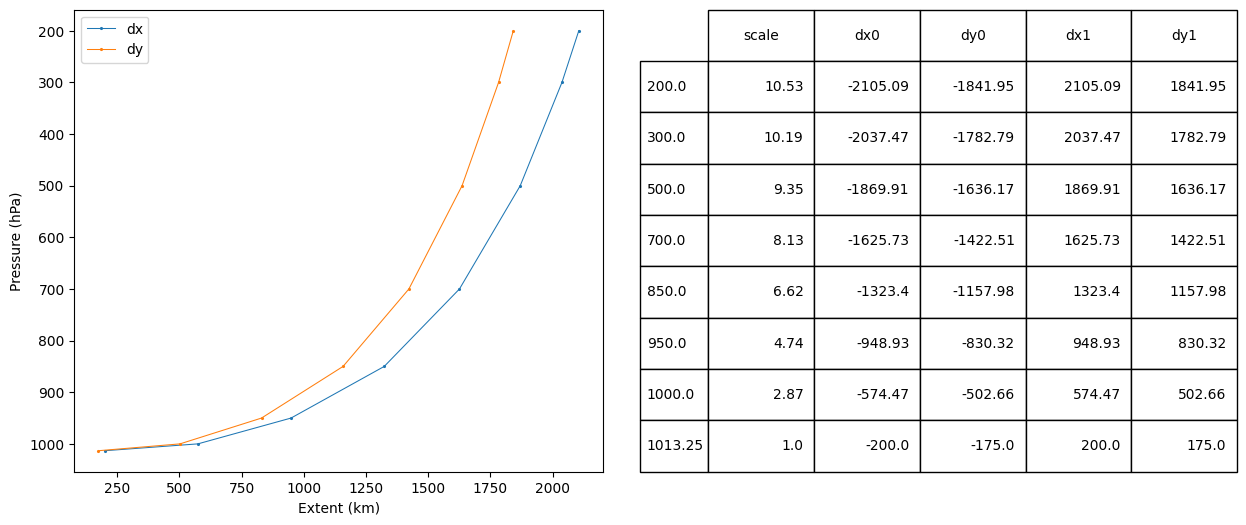

In [4]:
import numpy as np
import matplotlib.pyplot as plt

levels = [1013.25, 1000, 950, 850, 700, 500, 300, 200]
scale = ms.Mesoscale(200, 175, rate=10, levels=levels)
assert np.asanyarray(scale).shape == (len(levels), 4)
print(scale)
scale.plot.table()
plt.show()

In [5]:
from mesoscaler.enums import (
    # - ERA5
    GEOPOTENTIAL,
    SPECIFIC_HUMIDITY,
    TEMPERATURE,
    U_COMPONENT_OF_WIND,
    V_COMPONENT_OF_WIND,
    # - URMA
    SURFACE_PRESSURE,
    TEMPERATURE_2M,
    SPECIFIC_HUMIDITY_2M,
    U_WIND_COMPONENT_10M,
    V_WIND_COMPONENT_10M,
    SURFACE_PRESSURE,
)

_test_data = "../tests/data"

urma_store = os.path.join(_test_data, "urma.zarr")
era5_store = os.path.join(_test_data, "era5.zarr")
# define the variables and levels

era5_dvars = [
    GEOPOTENTIAL,
    TEMPERATURE,
    SPECIFIC_HUMIDITY,
    U_COMPONENT_OF_WIND,
    V_COMPONENT_OF_WIND,
]

urma_dvars = [
    SURFACE_PRESSURE,
    TEMPERATURE_2M,
    SPECIFIC_HUMIDITY_2M,
    U_WIND_COMPONENT_10M,
    V_WIND_COMPONENT_10M,
]
assert len(era5_dvars) == len(urma_dvars), "vard must be the same length in order to be resampled"

dsets = ms.open_datasets([(era5_store, era5_dvars), (urma_store, urma_dvars)], levels=levels)
dsets

DatasetSequence(size=2)[
<xarray.DependentDataset>
Dimensions:              (T: 2, Z: 7, Y: 721, X: 1440)
Coordinates:
    latitude             (Y, X) float32 90.0 90.0 90.0 ... -90.0 -90.0 -90.0
  * vertical             (Z) int64 200 300 500 700 850 950 1000
    longitude            (Y, X) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time                 (T) datetime64[ns] 2019-01-02 2019-01-02T01:00:00
Dimensions without coordinates: T, Z, Y, X
Data variables:
    geopotential         (T, Z, Y, X) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
    specific_humidity    (T, Z, Y, X) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
    temperature          (T, Z, Y, X) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
    u_component_of_wind  (T, Z, Y, X) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
    v_component_of_wind  (T, Z, Y, X) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
Attributes:
    depends:  Dependencies(ERA5)
<xarray.DependentDataset>
Dimensions:               (Y: 1597, X: 2345, T: 2, Z: 1)
Coordinates:
    latitude              (Y, X) float64 19.23 19.23 19.24 ... 54.38 54.38 54.37
    longitude             (Y, X) float64 233.7 233.7 233.8 ... 300.9 300.9 301.0
  * time                  (T) datetime64[ns] 2019-01-02 2019-01-02T01:00:00
  * vertical              (Z) float64 1.013e+03
Dimensions without coordinates: Y, X, T, Z
Data variables:
    specific_humidity_2m  (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    surface_pressure      (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    temperature_2m        (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    u_wind_component_10m  (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    v_wind_component_10m  (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
Attributes:
    depends:  Dependencies(URMA)
]

In [6]:
domain = scale.get_domain(dsets)
domain

Domain:
-  bbox: BoundingBox(west=-138.37319928236172, south=19.228975999999996, east=-59.042147941577866, north=57.08856116148375)
-  time: ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000']
- scale: 
  Mesoscale(size=8):
  -       scale: [ 1.00  2.87  4.74  6.62  8.13  9.35 10.19 10.53]
  - levels[hPa]: [1013.25 1000.00  950.00  850.00  700.00  500.00  300.00  200.00]
  -  extent[km]: 
  [[ -200.00  -175.00   200.00   175.00]
   [ -574.47  -502.66   574.47   502.66]
   [ -948.93  -830.32   948.93   830.32]
   [-1323.40 -1157.98  1323.40  1157.98]
   [-1625.73 -1422.51  1625.73  1422.51]
   [-1869.91 -1636.17  1869.91  1636.17]
   [-2037.47 -1782.79  2037.47  1782.79]
   [-2105.09 -1841.95  2105.09  1841.95]]

In [7]:
area_of_interest = -120, 30, -70, 25

ms.AreaOfInterestSampler(domain, aoi=area_of_interest)

AreaOfInterestSampler[
((-120.0, 30.0), ['2019-01-02T00:00:00.000000000'])
((-120.0, 30.0), ['2019-01-02T01:00:00.000000000'])
((-120.0, 28.75), ['2019-01-02T00:00:00.000000000'])
((-120.0, 28.75), ['2019-01-02T01:00:00.000000000'])
((-120.0, 27.5), ['2019-01-02T00:00:00.000000000'])
((-120.0, 27.5), ['2019-01-02T01:00:00.000000000'])
((-120.0, 26.25), ['2019-01-02T00:00:00.000000000'])
((-120.0, 26.25), ['2019-01-02T01:00:00.000000000'])
((-120.0, 25.0), ['2019-01-02T00:00:00.000000000'])
((-120.0, 25.0), ['2019-01-02T01:00:00.000000000'])
((-107.5, 30.0), ['2019-01-02T00:00:00.000000000'])
((-107.5, 30.0), ['2019-01-02T01:00:00.000000000'])
((-107.5, 28.75), ['2019-01-02T00:00:00.000000000'])
((-107.5, 28.75), ['2019-01-02T01:00:00.000000000'])
((-107.5, 27.5), ['2019-01-02T00:00:00.000000000'])
((-107.5, 27.5), ['2019-01-02T01:00:00.000000000'])
((-107.5, 26.25), ['2019-01-02T00:00:00.000000000'])
((-107.5, 26.25), ['2019-01-02T01:00:00.000000000'])
((-107.5, 25.0), ['2019-01-02T00:

In [8]:
partial = ms.AreaOfInterestSampler.partial(aoi=area_of_interest, time_batch_size=2)
partial(domain)

AreaOfInterestSampler[
((-120.0, 30.0), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-120.0, 28.75), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-120.0, 27.5), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-120.0, 26.25), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-120.0, 25.0), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-107.5, 30.0), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-107.5, 28.75), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-107.5, 27.5), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-107.5, 26.25), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-107.5, 25.0), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-95.0, 30.0), ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000'])
((-95.0, 28.75), ['2019-01-02T00:00:00.000000000' 

In [9]:
resampler = scale.resample(dsets, height=int(height), width=int(width))
resampler

In [10]:
texas = -106.6, 25.8, -93.5, 36.5
for (lon, lat), time in ms.AreaOfInterestSampler(domain, aoi=texas, time_batch_size=1):
    array = resampler.__call__(lon, lat, time)
    print(array.shape)
    break

(5, 1, 8, 70, 80)


In [24]:
import random
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.feature import STATES
import matplotlib.pyplot as plt
import pyresample.geometry


class Plotter:
    def __init__(self, x: np.ndarray, times: np.ndarray, levels: np.ndarray) -> None:
        self.arr = x
        self.times = list(times)
        self.levels = list(levels)

    def plot_level(self, time: np.datetime64, level: float):
        tidx = self.times.index(time)
        lvl = self.levels.index(level)
        area_extent = domain.scale.area_extent[lvl] * 1000
        area_def = pyresample.geometry.AreaDefinition(
            "",
            "",
            "",
            {"proj": "laea", "lon_0": lon, "lat_0": lat},
            width=width,
            height=height,
            area_extent=area_extent,
        )
        z, t, q, u, v = self.arr[:, tidx, lvl]  # 300 hPa
        x, y = area_def.get_lonlats()

        fig = plt.figure(figsize=(10, 10))

        ax = fig.add_subplot(1, 1, 1, projection=area_def.to_cartopy_crs())
        assert isinstance(ax, GeoAxes)

        ax.coastlines()
        transform = ccrs.PlateCarree()
        ax.add_feature(STATES)
        ax.gridlines()

        ax.contour(
            x,
            y,
            z,
            colors="k",
            linewidths=1,
            transform=transform,
        )

        ax.contour(
            x,
            y,
            t,
            colors="r",
            linewidths=1,
            linestyles="--",
            transform=transform,
        )
        ax.contourf(
            x,
            y,
            q,
            cmap="Greens",
            transform=transform,
        )

        ax.barbs(
            x,
            y,
            u,
            v,
            length=2,
            pivot="middle",
            transform=transform,
        )


texas = -106.6, 25.8, -93.5, 36.5
r = scale.resample(dsets, height=int(height), width=int(width))
s = ms.AreaOfInterestSampler(domain, aoi=texas, time_batch_size=2)


(lon, lat), time = random.choice(s.indices)
p = r.plot(lon, lat, time)
p

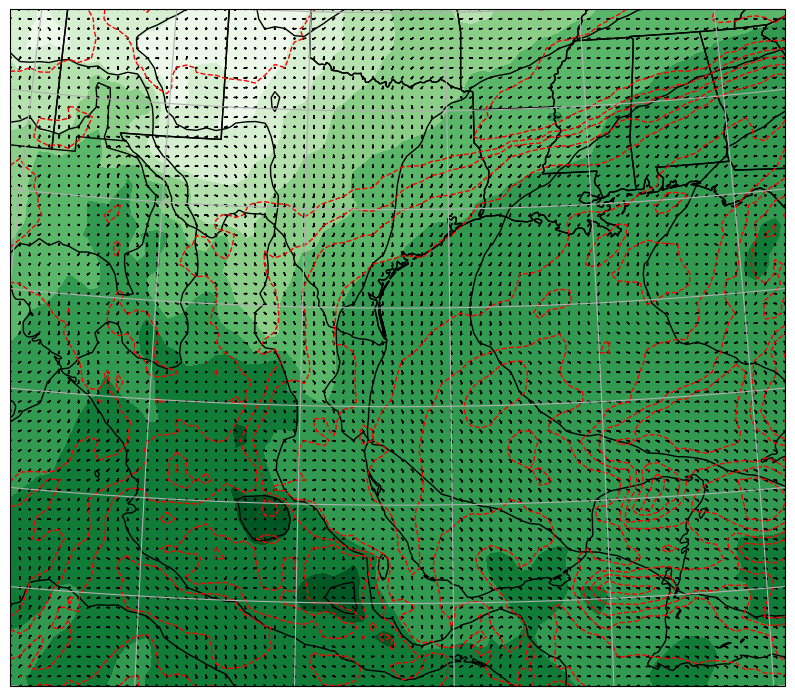

In [30]:
p.level(time[1], 850)

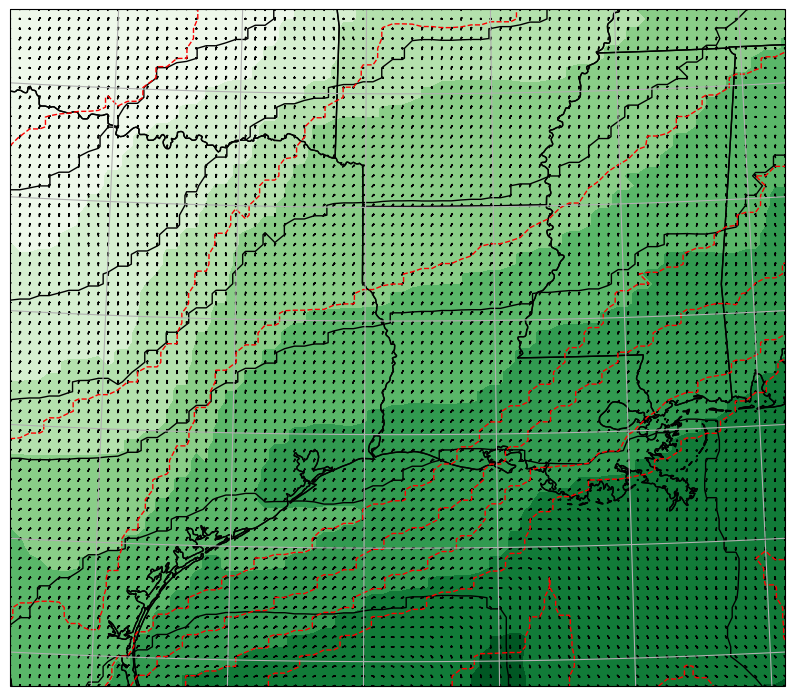

In [18]:
p.level(time[0], 1000)

In [13]:
producer = ms.create.producer(
    dsets,
    ms.AreaOfInterestSampler.partial(aoi=area_of_interest, time_batch_size=1),
    height=int(height),
    width=int(width),
    dx=dx,
    dy=dy,
).shuffle(seed=0)

for (lon, lat), time in producer:
    print(producer.get_dataset(lon, lat, time))
    break

<xarray.Dataset>
Dimensions:              (T: 1, Z: 5, Y: 70, X: 80)
Coordinates:
    vertical             (Z) float64 1.013e+03 850.0 700.0 500.0 300.0
Dimensions without coordinates: T, Z, Y, X
Data variables:
    geopotential         (T, Z, Y, X) float32 nan nan nan ... 9.498e+04 9.5e+04
    specific_humidity    (T, Z, Y, X) float32 nan nan ... 0.0001369 0.0001884
    temperature          (T, Z, Y, X) float32 nan nan nan ... 241.9 242.1 242.1
    u_component_of_wind  (T, Z, Y, X) float32 nan nan nan ... 23.75 22.18 18.54
    v_component_of_wind  (T, Z, Y, X) float32 nan nan nan ... 18.15 17.86 16.95
